# Домашнее задание к лекции "Визуализация данных"

## Обязательная часть

Вам необходимо провести базовый [EDA](https://en.wikipedia.org/wiki/Exploratory_data_analysis) выбранного набора данных. 

Требования к анализу:
- построить не менее 4 визуализаций различных видов;
- каждая визуализация должным образом оформлена и читается даже в отрыве от контекста; 
- по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

**Откуда брать данные?**

Можете взять свои рабочие данные, либо найти открытые данные (например, на [kaggle.com](https://www.kaggle.com/)) по интересующей вас предметной области (тогда не забудьте их выложить на github вместе с ноутбуком). Если идей нет, можете взять один из перечисленных ниже:
- [данные приложений из Google Play](https://www.kaggle.com/lava18/google-play-store-apps);
- [данные о видео из трендов YouTube](https://www.kaggle.com/datasnaek/youtube-new);
- [данные об уровне счастья в разных странах](https://www.kaggle.com/unsdsn/world-happiness).


[Kagle_data_page](https://www.kaggle.com/ashfakyeafi/pbd-load-history)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [66]:
df = pd.read_csv('PDB_Load_History.csv', parse_dates=[0])
# Convert temperature to degrees Celsius
df['temperature'] = df['temperature'].apply(lambda t_F: round(((t_F - 32) / 1.8), 2))
df.head()

,date,year,month,day,weekday,hour,demand,temperature
0,2003-03-01,2003,3,1,7,1,12863.0,-1.67
1,2003-03-01,2003,3,1,7,2,12389.0,-2.22
2,2003-03-01,2003,3,1,7,3,12155.0,-1.67
3,2003-03-01,2003,3,1,7,4,12072.0,-2.78
4,2003-03-01,2003,3,1,7,5,12160.0,-1.67


In [50]:
df[['year', 'demand', 'temperature']].groupby('year').describe()

demand                                                                  \
       count          mean          std     min       25%      50%       75%   
year                                                                           
2003  7344.0  14523.515863  2929.966344  8820.0  12230.50  14790.5  16348.75   
2004  8784.0  14880.823201  2840.632948  9020.0  12634.75  15174.5  16829.25   
2005  8760.0  15305.089726  3083.417472  9159.0  13054.50  15344.5  17220.25   
2006  8760.0  14833.165297  2946.357848  9018.0  12575.50  15047.0  16586.00   
2007  8760.0  15106.072146  2886.710287  9335.0  12916.00  15296.0  16955.25   
2008  8784.0  14790.123008  2784.593970  9093.0  12632.00  15050.5  16590.00   
2009  8760.0  14261.962728  2742.310301  8893.0  12260.00  14512.0  15953.25   
2010  8760.0  14702.184132  3022.227822  8994.0  12514.00  14727.0  16373.00   
2011  8760.0  14495.509247  2809.203801  8101.0  12425.75  14617.5  16269.00   
2012  8784.0  14350.458390  2879.215972  7794.0  12267.00  14397.0  15922.00   
2013  8760.0  14527.506164  2910.441575  9025.0  12429.00  14523.0  16159.50   
2014  8760.0  14298.491438  2682.512873  8974.0  12354.00  14340.0  16005.25   

              temperature                                                   \
          max       count       mean        std    min   25%    50%    75%   
year                                                                         
2003  24330.0      7344.0  11.922855   9.135839 -16.11  5.00  12.78  19.44   
2004  23750.0      8784.0   9.413243  10.440315 -21.67  1.67  10.00  18.33   
2005  26416.0      8760.0   9.847045  10.790123 -20.56  1.11  10.00  18.89   
2006  27622.0      8760.0  10.874252   9.343350 -14.44  3.89  10.56  18.33   
2007  25785.0      8760.0   9.966441  10.776575 -17.22  1.11  10.56  18.89   
2008  25696.0      8784.0  10.069669   9.961337 -16.67  1.67  10.00  18.33   
2009  24723.0      8760.0   9.404750   9.969164 -18.33  2.22  10.00  17.22   
2010  26705.0      8760.0  11.019989  10.316053 -16.67  2.22  11.11  19.44   
2011  27333.0      8760.0  10.588466  10.256377 -21.11  2.22  11.67  18.89   
2012  25553.0      8784.0  11.406450   9.426873 -15.00  3.33  11.67  18.89   
2013  26919.0      8760.0  10.008647  10.333556 -17.22  1.67  10.00  18.33   
2014  24089.0      8760.0   9.578218  10.593151 -20.00  1.11  10.56  18.33   

             
        max  
year         
2003  32.78  
2004  32.22  
2005  33.89  
2006  35.56  
2007  33.89  
2008  32.78  
2009  32.78  
2010  35.56  
2011  37.78  
2012  34.44  
2013  35.00  
2014  31.67

***Так как в среднем потребление энергии и температура изменяются незначительно выберем только 1 год для последуйщего анализа.***

***Возьмем 2012 год для анализа.***

In [227]:
df = df[df['year'] == 2012]
by_year = df[['month', 'demand', 'temperature']].groupby(['month']).mean()

In [166]:
# January
by_hour = df[df['month'] == 1][['hour', 'demand']].groupby(['hour']).mean()

Text(0, 0.5, 'Потребление')

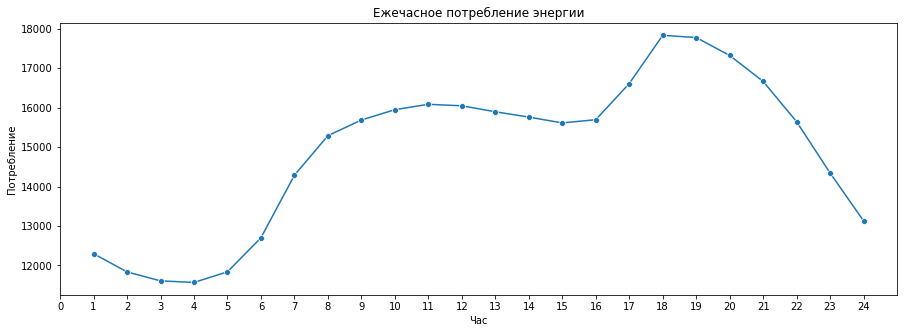

In [232]:
plt.figure(figsize=(15,5))
sns.lineplot(data=by_hour, x='hour', y='demand', marker='o')

plt.xlim(0, 25)
plt.xticks(range(0,25))
plt.title('Ежечасное потребление энергии')
plt.xlabel('Час')
plt.ylabel('Потребление')


<AxesSubplot:xlabel='month', ylabel='demand'>

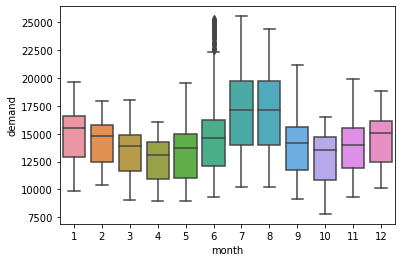

In [218]:
sns.boxplot(data=df, x='month', y='demand')

<AxesSubplot:xlabel='temperature', ylabel='demand'>

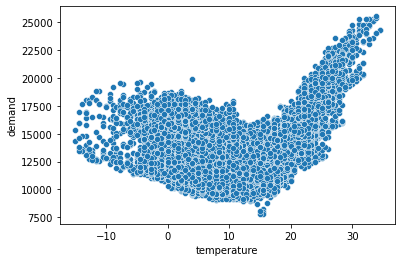

In [225]:
sns.scatterplot(data=df, x='temperature', y='demand')

### Можно выдвинуть несколько гипотез. Для них уже нужно собирать другие данные.

- В жаркие периоды используется больше энергии для охлаждения помещений (кондиционеры).
- Потребление энергии зависит от светового дня
- [x] Потребление энергии зависит от времени суток



# Датасет 2


* построить дополнительно не менее 2 визуализаций (итого не менее 6);
* в работе должны присутствовать следующие визуализации: boxplot, heatmap, scatter plot matrix;


In [263]:
students = pd.read_csv('StudentsPerformance.csv')
# students['gender'].replace(['male', 'female'],[1, 2], inplace=True)
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


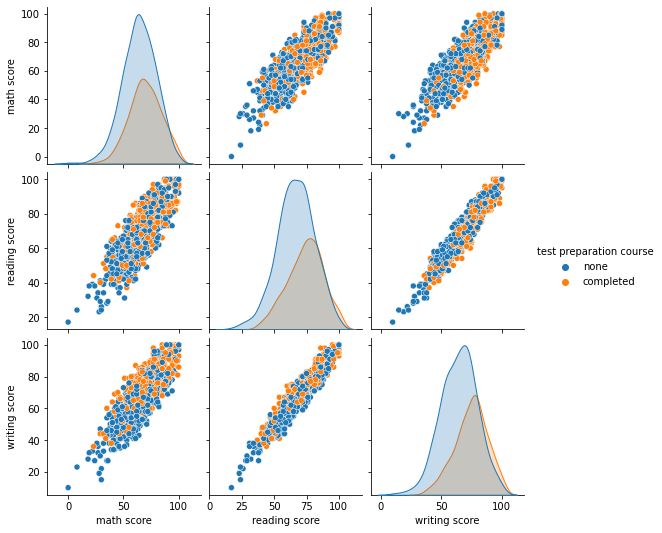

In [266]:
sns.pairplot(students, hue='test preparation course')

<AxesSubplot:xlabel='gender', ylabel='math score'>

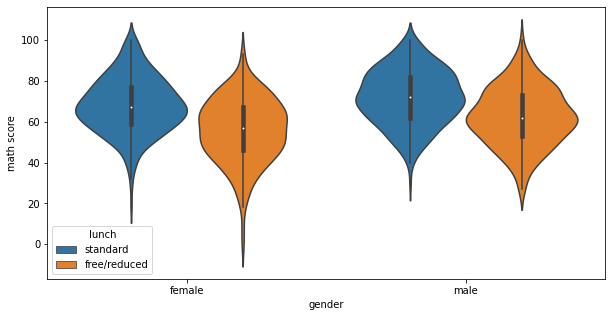

In [295]:
plt.figure(figsize=(10,5))
sns.violinplot(data=students, x='gender', y='math score', hue='lunch')


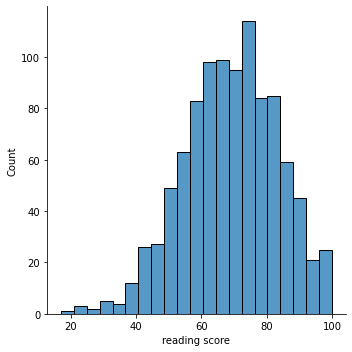

In [301]:
sns.displot(students['reading score'])

<AxesSubplot:xlabel='race/ethnicity', ylabel='parental level of education'>

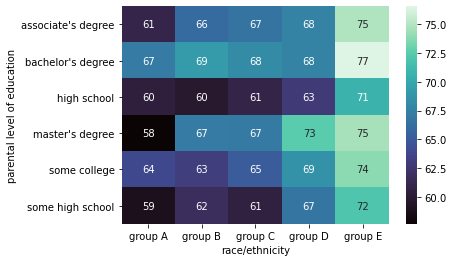

In [293]:
pivot = students.pivot_table(index='parental level of education', columns='race/ethnicity', values='math score')
sns.heatmap(pivot, cmap='mako', annot=True)

<AxesSubplot:xlabel='race/ethnicity', ylabel='parental level of education'>

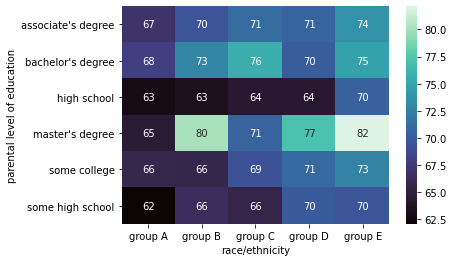

In [294]:
pivot = students.pivot_table(index='parental level of education', columns='race/ethnicity', values='reading score')
sns.heatmap(pivot, cmap='mako', annot=True)

#### ПРИМЕЧАНИЕ
Домашнее задание сдается ссылкой на репозиторий [GitHub](https://github.com/).
Не сможем проверить или помочь, если вы пришлете:
- файлы;
- архивы;
- скриншоты кода.

Все обсуждения и консультации по выполнению домашнего задания ведутся только на соответствующем канале в slack.

##### Как правильно задавать вопросы аспирантам, преподавателям и коллегам
Прежде чем задать вопрос, попробуйте найти ответ в интернете. Навык самостоятельного поиска информации — один из важнейших. Каждый практикующий специалист любого уровня делает это ежедневно.

Сформулируйте вопрос по алгоритму:  
1) Что я делаю?  
2) Какого результата я ожидаю?  
3) Как фактический результат отличается от ожидаемого?  
4) Что я уже попробовал сделать, чтобы исправить проблему?  

По возможности прикрепите к вопросу скриншоты либо ссылки на код. Не выкладывайте все решение, оставляйте только проблемный и воспроизводимый участок кода.